# **IMPORT DATASET**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import os

# Mendapatkan path folder tempat notebook saat ini berada
folder_path = r'C:\Users\ZAINUL\ProjectGizi'

# Mengubah direktori kerja ke folder tersebut
os.chdir(folder_path)

# Verifikasi direktori kerja
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\ZAINUL\ProjectGizi


In [9]:
import pandas as pd

# Membaca file gabungan langsung ke dalam DataFrame
file_gabungan = 'Gizi_Anak_Indramayu.xlsx'
gabungan = pd.read_excel(file_gabungan)


# **EXPLORASI DATA**

In [10]:
# Menampilkan beberapa baris pertama dari data
print("Beberapa baris pertama dari data:")
print(gabungan.head())

# Menampilkan informasi umum tentang DataFrame
print("\nInformasi tentang DataFrame:")
print(gabungan.info())

# Menampilkan statistik deskriptif
print("\nStatistik deskriptif dari data numerik:")
print(gabungan.describe())

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah nilai yang hilang di setiap kolom:")
print(gabungan.isnull().sum())

# Menampilkan jumlah data unik di setiap kolom
print("\nJumlah data unik di setiap kolom:")
print(gabungan.nunique())

# Menampilkan tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(gabungan.dtypes)

print("\nDistribusi kategori (jika ada kolom kategori):")
for col in gabungan.select_dtypes(include=['object', 'category']):
    print(f"\nDistribusi nilai pada kolom '{col}':")
    print(gabungan[col].value_counts())


Beberapa baris pertama dari data:
   No                NIK           Nama  JK            Tgl_Lahir  BB_Lahir  \
0  No                NIK           Nama  JK            Tgl Lahir  BB Lahir   
1   1  3212116412180001   AGNIA KHUSNUL   P  2018-12-14 00:00:00         3   
2   2  3212112506190001            DAVI   L  2019-06-25 00:00:00         3   
3   3  3212156909190001           QUEEN   P  2019-09-29 00:00:00         3   
4   4  3212154406180001           SENJA   P  2018-06-04 00:00:00         3   

   TB_Lahir         Nama_Ortu        Prov       Kab_Kota  ...  \
0  TB Lahir         Nama Ortu        Prov       Kab/Kota  ...   
1       NaN  SUJANI / KAMINIH  JAWA BARAT  KAB INDRAMAYU  ...   
2        50     RATNA/SAUDANA  JAWA BARAT  KAB INDRAMAYU  ...   
3       NaN              YOYO  JAWA BARAT  KAB INDRAMAYU  ...   
4       NaN       FAJAR/INTAN  JAWA BARAT  KAB INDRAMAYU  ...   

   Naik_Berat_Badan    PMT_Diterima_kg  Jml_Vit_A  KPSP  KIA  Detail  \
0  Naik Berat Badan  PMT Diterima 

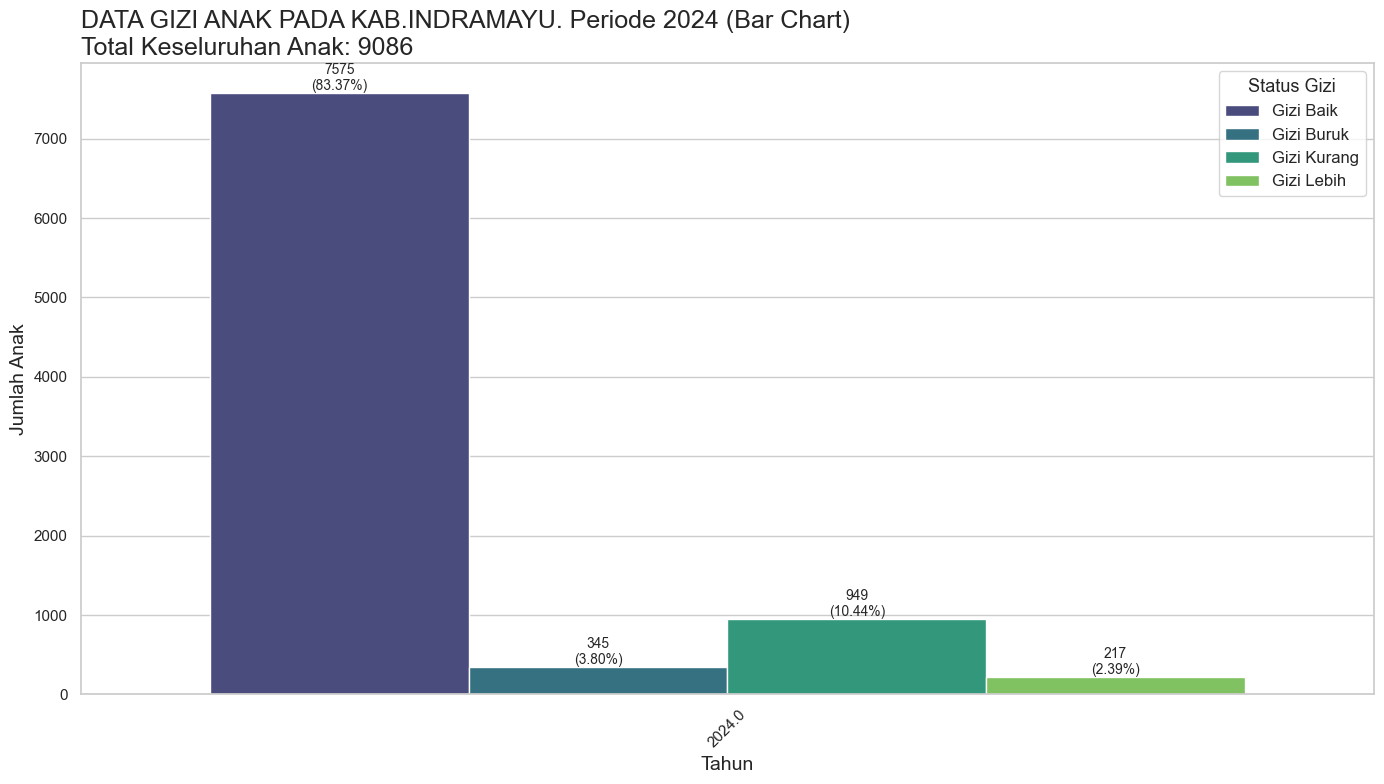

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah kolom Tanggal_Pengukuran menjadi format datetime
gabungan['Tanggal_Pengukuran'] = pd.to_datetime(
    gabungan['Tanggal_Pengukuran'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

# Menambahkan kolom Tahun
gabungan['Tahun'] = gabungan['Tanggal_Pengukuran'].dt.year

# Memfilter data hanya untuk tahun 2024
data_2024 = gabungan[gabungan['Tahun'] == 2024]

# Menghilangkan kategori 'Outlier'
data_filtered = data_2024[data_2024['Status_Gizi'] != 'Outlier'].copy()  # Salin data untuk menghindari SettingWithCopyWarning

# Mengatur urutan kategori Status Gizi
status_gizi_order = ["Gizi Baik", "Gizi Buruk", "Gizi Kurang", "Gizi Lebih"]
data_filtered.loc[:, 'Status_Gizi'] = pd.Categorical(data_filtered['Status_Gizi'], categories=status_gizi_order, ordered=True)

# Menghitung total keseluruhan jumlah anak tanpa outlier
total_keseluruhan_anak = data_filtered.shape[0]

# Palette untuk status gizi
palette = sns.color_palette("viridis", n_colors=len(status_gizi_order))

# Grafik 1: Bar Chart berdasarkan Tahun
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")
ax1 = sns.countplot(data=data_filtered, x='Tahun', hue='Status_Gizi', palette=palette, hue_order=status_gizi_order)

# Menambahkan anotasi pada setiap batang dengan jumlah dan persentase
for p in ax1.patches:
    jumlah = int(p.get_height())  # Mengambil jumlah anak dari tinggi batang
    if jumlah > 0:  # Menambahkan anotasi hanya jika jumlah lebih besar dari 0
        persentase = (jumlah / total_keseluruhan_anak) * 100
        ax1.annotate(f'{jumlah}\n({persentase:.2f}%)',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Menambahkan total keseluruhan anak di kanan atas judul
title_text = 'DATA GIZI ANAK PADA KAB.INDRAMAYU. Periode 2024 (Bar Chart)'
plt.title(f'{title_text}\nTotal Keseluruhan Anak: {total_keseluruhan_anak}', fontsize=18, loc='left')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Anak', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Status Gizi', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()

# **PREPROCESSING**



```
# Menggunakan Data Terbaru = Tahun 2024
```




In [33]:
import pandas as pd

file_gabungan = 'Gizi_Anak_Indramayu.xlsx'
gabungan = pd.read_excel(file_gabungan)


if 'Tanggal_Pengukuran' in gabungan.columns:
    # Bersihkan data kolom
    gabungan['Tanggal_Pengukuran'] = gabungan['Tanggal_Pengukuran'].astype(str).str.strip()

    # Ubah kolom 'Tanggal_Pengukuran' menjadi format datetime dengan format eksplisit
    gabungan['Tanggal_Pengukuran'] = pd.to_datetime(
        gabungan['Tanggal_Pengukuran'],
        format='%Y-%m-%d %H:%M:%S',
        errors='coerce'
    )

    # Filter data hanya untuk tahun 2024
    data_2024 = gabungan[gabungan['Tanggal_Pengukuran'].dt.year == 2024]

    data_2024 = data_2024.dropna(subset=['Tanggal_Pengukuran'])

elif 'Tanggal Pengukuran' in gabungan.columns:
    gabungan['Tanggal Pengukuran'] = gabungan['Tanggal Pengukuran'].astype(str).str.strip()
    gabungan['Tanggal Pengukuran'] = pd.to_datetime(
        gabungan['Tanggal Pengukuran'],
        format='%Y-%m-%d %H:%M:%S',
        errors='coerce'
    )
    data_2024 = gabungan[gabungan['Tanggal Pengukuran'].dt.year == 2024]
    data_2024 = data_2024.dropna(subset=['Tanggal Pengukuran'])
else:
    raise ValueError("Kolom 'Tanggal_Pengukuran' atau 'Tanggal Pengukuran' tidak ditemukan dalam data.")

# Fungsi untuk mengekstrak tahun dari string usia
def extract_years(age_str):
    if isinstance(age_str, str) and 'Tahun' in age_str:
        try:
            return int(age_str.split('Tahun')[0].strip())
        except ValueError:
            return None  # Kembalikan None jika tidak bisa dikonversi
    return None  # Kembalikan None jika format tidak sesuai

# Langkah 3: Mengambil usia dari kolom 'Usia_Saat_Ukur'
data_2024['Usia_Saat_Ukur'] = data_2024['Usia_Saat_Ukur'].astype(str)
data_2024['Usia_Tahun'] = data_2024['Usia_Saat_Ukur'].apply(extract_years)

# Menghilangkan kategori 'Outlier' dari data
data_filtered = data_2024[data_2024['Status_Gizi'] != 'Outlier']
# Menghitung jumlah anak untuk setiap Status Gizi tanpa kategori 'Outlier'
status_counts = data_filtered['Status_Gizi'].value_counts().reset_index()
status_counts.columns = ['Status_Gizi', 'Jumlah']

# Langkah 5: Mengelompokan data berdasarkan Status Gizi, Usia Saat Ukur, dan Wilayah Desa
grouped_data = data_filtered.groupby(['Desa_Kel', 'Usia_Saat_Ukur', 'Status_Gizi']).size().reset_index(name='Jumlah')

In [35]:
print("Jumlah data awal:", len(gabungan))
print("Jumlah data setelah filter tahun 2024:", len(data_2024))
print("Jumlah data setelah menghapus outlier:", len(data_filtered))

Jumlah data awal: 42616
Jumlah data setelah filter tahun 2024: 9107
Jumlah data setelah menghapus outlier: 9086


# **MODELING**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [39]:
# Konversi Status Gizi menjadi label numerik
status_gizi_mapping = {
    'Gizi Baik': 0,
    'Gizi Kurang': 1,
    'Gizi Buruk': 2,
    'Gizi Lebih': 3
}
data_filtered['Status_Gizi_Label'] = data_filtered['Status_Gizi'].map(status_gizi_mapping)

# Memilih fitur dan target
X = data_filtered[['Usia_Bulan', 'Berat', 'Tinggi']]  # Pilih fitur yang relevan
y = data_filtered['Status_Gizi_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.set_option('future.no_silent_downcasting', True)

# Ganti nilai '-' dengan NaN
X_train = X_train.replace('-', np.nan)
X_test = X_test.replace('-', np.nan)

# Mengisi nilai NaN dengan mean kolom
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

C:\Users\ZAINUL\AppData\Local\Temp\ipykernel_15508\2066203228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Status_Gizi_Label'] = data_filtered['Status_Gizi'].map(status_gizi_mapping)


In [99]:
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 7268
Jumlah data uji: 1818


In [100]:
import numpy as np

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)


# Evaluasi performa model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1495   27    0    0]
 [  45  139    6    0]
 [   2   22   43    3]
 [   8    0    0   28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1522
           1       0.74      0.73      0.74       190
           2       0.88      0.61      0.72        70
           3       0.90      0.78      0.84        36

    accuracy                           0.94      1818
   macro avg       0.87      0.78      0.82      1818
weighted avg       0.94      0.94      0.94      1818



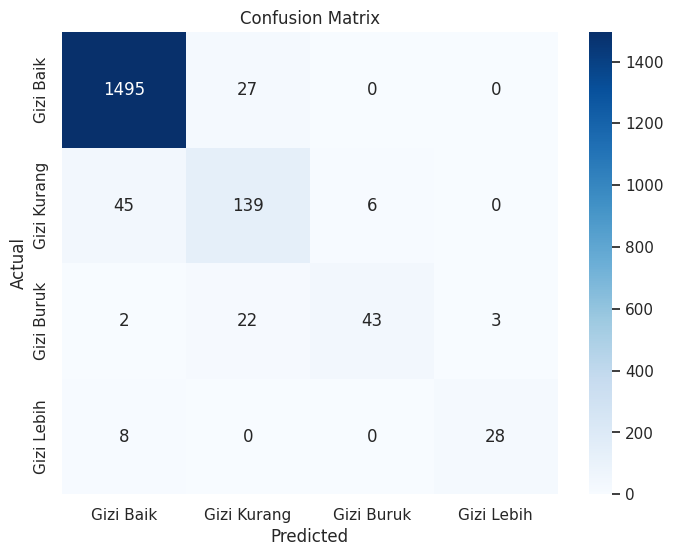

In [101]:
# Visualisasi confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=status_gizi_mapping.keys(), yticklabels=status_gizi_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


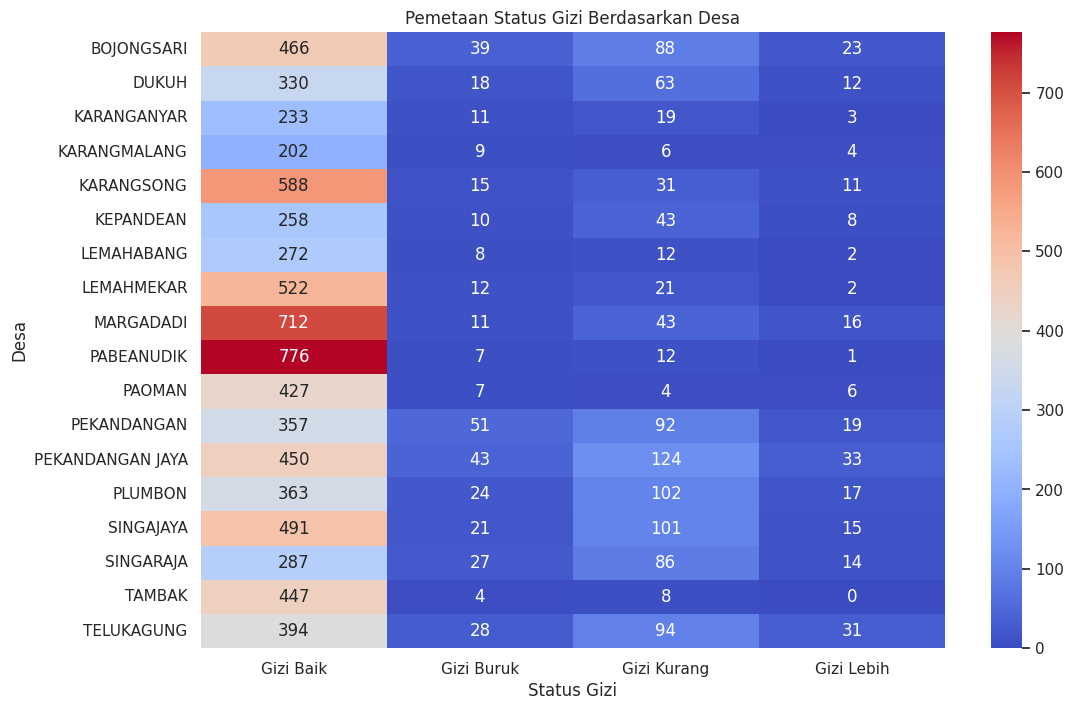

In [102]:
# Mengelompokkan data berdasarkan desa dan status gizi
desa_gizi_summary = data_filtered.groupby(['Desa_Kel', 'Status_Gizi']).size().reset_index(name='Jumlah')

# Pivot untuk visualisasi heatmap
desa_pivot = desa_gizi_summary.pivot(index='Desa_Kel', columns='Status_Gizi', values='Jumlah').fillna(0)

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(desa_pivot, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Pemetaan Status Gizi Berdasarkan Desa')
plt.xlabel('Status Gizi')
plt.ylabel('Desa')
plt.show()


In [103]:
import joblib

# Misalnya model sudah dilatih dan disimpan dalam variabel rf_model
joblib.dump(rf_model, 'model_rf.pkl')


['model_rf.pkl']

# **UJI MODEL DAN IMPLEMENTASI XAI**

In [116]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9745b76c49403cbc224e997c38a644652f2265db7146f67b8928ea0284bde317
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [120]:
import joblib
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Memuat model yang sudah disimpan
rf_model = joblib.load('model_rf.pkl')

# Fungsi untuk prediksi status gizi berdasarkan input manual
def prediksi_status_gizi(usia_bulan, berat, tinggi):
    # Membuat data input sesuai format yang diterima model
    data_input = {
        'Usia_Bulan': [usia_bulan],  # Usia dalam bulan
        'Berat': [berat],  # Berat badan dalam kg
        'Tinggi': [tinggi],  # Tinggi badan dalam cm
    }

    # Convert data input ke DataFrame agar sesuai dengan format input model
    df_input = pd.DataFrame(data_input)

    # Mengganti nilai '-' dengan NaN jika ada dan mengisi dengan mean kolom
    df_input = df_input.replace('-', np.nan)
    df_input = df_input.fillna(df_input.mean())

    # Melakukan prediksi
    prediksi = rf_model.predict(df_input)
    prediksi_proba = rf_model.predict_proba(df_input)

    # Menampilkan hasil prediksi
    status_gizi_mapping = {
        0: "Gizi Baik",
        1: "Gizi Kurang",
        2: "Gizi Buruk",
        3: "Gizi Lebih"
    }
    hasil = status_gizi_mapping[prediksi[0]]

    # Menjelaskan prediksi menggunakan LIME
    explainer = LimeTabularExplainer(
        training_data=np.array(df_input),  # Data latih untuk LIME
        feature_names=df_input.columns,  # Nama fitur
        class_names=list(status_gizi_mapping.values()),  # Nama kelas
        mode='classification',  # Mode klasifikasi
        discretize_continuous=False  # Hindari diskretisasi untuk menghindari FutureWarning
    )

    # Mendapatkan penjelasan untuk prediksi
    explanation = explainer.explain_instance(
        data_row=df_input.iloc[0],  # Data input untuk dijelaskan
        predict_fn=rf_model.predict_proba  # Fungsi prediksi model
    )

    # Menampilkan penjelasan
    print("\nPenjelasan Prediksi dengan LIME:")
    explanation.show_in_notebook(show_table=True)

    return hasil

# Menerima input manual dari pengguna
usia_bulan = int(input("Masukkan usia dalam bulan: "))
berat = float(input("Masukkan berat badan (kg): "))
tinggi = float(input("Masukkan tinggi badan (cm): "))

# Prediksi status gizi
status_gizi = prediksi_status_gizi(usia_bulan, berat, tinggi)

# Menampilkan hasil prediksi
print(f"\nStatus Gizi: {status_gizi}")


Masukkan usia dalam bulan: 19
Masukkan berat badan (kg): 5
Masukkan tinggi badan (cm): 82

Penjelasan Prediksi dengan LIME:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Status Gizi: Gizi Buruk


# **DASHBOARD APLIKASI**

In [121]:
!pip install folium

In [122]:
!pip install pyproj

In [123]:
!pip install geopandas

In [124]:
!pip install selenium pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 15.7 MB/s eta 0:00:00


In [126]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [128]:
!pip install streamlit-folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 6.2 MB/s eta 0:00:00


In [146]:
!pip install dash
!pip install dash-bootstrap-components
!pip install folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 5.7 MB/s eta 0:00:00


In [174]:
%%writefile app.py
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import st_folium
from sklearn.cluster import KMeans
import json
import random

# Membaca file GeoJSON
with open('indramayu.geojson') as f:
    geo_data = json.load(f)

# Mengubah nama desa menjadi uppercase
for feature in geo_data['features']:
    feature['properties']['name'] = feature['properties']['name'].upper()


desa_names = [
    'BOJONGSARI', 'DUKUH', 'KARANGANYAR', 'KARANGMALANG', 'KARANGSONG',
    'KEPANDEAN', 'LEMAHABANG', 'LEMAHMEKAR', 'MARGADADI', 'PABEANUDIK',
    'PAOMAN', 'PECANDANGAN', 'PEKANDANGAN JAYA', 'PLUMBON', 'SINGA',
    'SINGARAJA', 'TAMBAK', 'TELUKAGUNG'
]
# Generate random data for Status_Gizi to match the length of desa_names
status_gizi_options = ['Gizi Buruk', 'Gizi Baik', 'Gizi Kurang', 'Gizi Lebih']
status_gizi = [random.choice(status_gizi_options) for _ in range(len(desa_names))]

# Membaca data gizi
data_filtered = pd.DataFrame({
    'Desa_Kel': desa_names,  # Automatically using desa names from geo_data
    'Status_Gizi': status_gizi  # Randomly generated Status_Gizi
})

# Membaca data gizi
data_filtered['Desa_Kel'] = data_filtered['Desa_Kel'].str.upper()

# Membuat pivot table berdasarkan Status_Gizi
data_pivot = data_filtered.pivot_table(
    index='Desa_Kel',
    columns='Status_Gizi',
    aggfunc='size',
    fill_value=0
).reset_index()

# Mengganti nama kolom untuk kemudahan
data_pivot.columns.name = None
data_pivot = data_pivot.rename(columns={
    'Desa_Kel': 'Desa_Kel',
    'Gizi Buruk': 'Gizi Buruk',
    'Gizi Baik': 'Gizi Baik',
    'Gizi Kurang': 'Gizi Kurang',
    'Gizi Lebih': 'Gizi Lebih'
})

# Menambahkan koordinat desa
coordinates = []
for desa in data_pivot['Desa_Kel']:
    found = False
    for feature in geo_data['features']:
        if feature['properties']['name'] == desa:
            coordinates.append(feature['geometry']['coordinates'])
            found = True
            break
    if not found:
        # Append a default value if coordinates are not found
        coordinates.append([0, 0])  # Or append None if you prefer

data_pivot['Coordinates'] = coordinates

# K-Means Clustering
X = data_pivot[['Gizi Buruk']].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
data_pivot['Cluster'] = kmeans.labels_

# Streamlit UI
st.title("Pemetaan Daerah dengan Tingkat Gizi Buruk")
st.markdown("""
Aplikasi ini memvisualisasikan tingkat gizi buruk di wilayah tertentu,
dengan prioritas intervensi berdasarkan clustering.
""")

# Membuat peta dasar
m = folium.Map(location=[-6.454198, 108.3626961], zoom_start=10)

# Menambahkan marker untuk setiap desa
for _, row in data_pivot.iterrows():
    desa_name = row['Desa_Kel']
    coords = row['Coordinates']
    cluster = row['Cluster']
    color = 'red' if cluster == 2 else 'orange' if cluster == 1 else 'green'

    tooltip_content = f"""
    <b>Desa: {desa_name}</b><br>
    Gizi Buruk: {row['Gizi Buruk']} anak<br>
    Gizi Baik: {row['Gizi Baik']} anak<br>
    Gizi Kurang: {row['Gizi Kurang']} anak<br>
    Gizi Lebih: {row['Gizi Lebih']} anak<br>
    Prioritas Intervensi: {"Tinggi" if cluster == 2 else "Sedang" if cluster == 1 else "Rendah"}
    """

    # Check if coordinates are valid before adding marker
    if coords != [0, 0]:
        folium.CircleMarker(
            location=[coords[1], coords[0]],  # GeoJSON stores coordinates as [lon, lat]
            radius=15,
            color='black',
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            tooltip=tooltip_content
        ).add_to(m)

# Menambahkan peta ke Streamlit
st_data = st_folium(m, width=700, height=500)

# Menampilkan rekomendasi
st.subheader("Rekomendasi Prioritas Intervensi")
prioritas_tinggi = data_pivot[data_pivot['Cluster'] == 2]
st.write("### Desa dengan Prioritas Tinggi:")
st.table(prioritas_tinggi[['Desa_Kel', 'Gizi Buruk']])



Overwriting app.py


In [153]:
!pip install streamlit
!pip install pyngrok

In [159]:
!ngrok authtoken 2l3pNlnvlXg2cBuIOg33wjJiPpG_3t374o8ToMBWUF8jhX9Ns

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [158]:
!pip install --upgrade pyngrok

In [177]:
ngrok.kill()


In [178]:
from pyngrok import ngrok
import subprocess

# Start the Streamlit app in a subprocess
subprocess.Popen(['streamlit', 'run', 'app.py'])

# Connect ngrok to port 8501 (Streamlit default port)
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://61fc-35-185-217-91.ngrok-free.app" -> "http://localhost:8501"
